# Check that in the reimport module

"If the standard deviation of the weighted residuals is significantly different from  one,  then  the  residuals  have  been  improperly weighted resulting in biased flux estimates"

https://reader.elsevier.com/reader/sd/pii/S1096717606000061?token=ABD4DD7567D8BD2D43763248F50716CABA5FEDC3C7E8370AE6F3C514A790D6953F5CCCF7FE22A552BE858AE61F065706&originRegion=eu-west-1&originCreation=20210426154011

The example notebook is a good start. The two methods to integrate the MFA bounds are well implemented and explained. My suggestions are the following:

- **Adding a few plots of the distribution of points per reaction. It is interesting to visually inspect how gaussian the samples distributions are. In rare cases, bimodal distributions can be found**
- **Adding a box and whiskers or similar for several reactions of interest to visualize the distribution of points**
- **Calculating the flux splits at key branch points (e.g., glycolysis vs. PPP, TCA vs. acetate secretion, glyoxylate shunt vs. full TCA, etc.)**
- Calculating the flux resolution
- Calculating the exchange fluxes and determining what forward and reverse fluxes can be differentiated

As a last comment, I am not sure the MOMA/ROOM/pFBA parts are needed.

Ping me if you have any questions. I think the definitions for the flux splits, resolution, exchange fluxes, and forward/backward differentiation can be found here https://doi.org/10.1021/acs.analchem.5b04914 or here https://doi.org/10.1021/acs.analchem.5b03887. Also, the code for the calculations is implemented in my old SBaaS repositories for MFA.

## Adding a few plots of the distribution of points per reaction. It is interesting to visually inspect how gaussian the samples distributions are. In rare cases, bimodal distributions can be found

In [36]:
show_subsystems(model)

0: Extracellular exchange
1: Intracellular demand
2: Biomass and maintenance functions
3: Transport, Inner Membrane
4: Transport, Outer Membrane Porin
5: Transport, Outer Membrane
6: Nucleotide Salvage Pathway
7: Glycerophospholipid Metabolism
8: Alternate Carbon Metabolism
9: Cofactor and Prosthetic Group Biosynthesis
10: Cell Envelope Biosynthesis
11: Methylglyoxal Metabolism
12: Arginine and Proline Metabolism
13: Membrane Lipid Metabolism
14: Pyruvate Metabolism
15: Tyrosine, Tryptophan, and Phenylalanine Metabolism
16: Murein Recycling
17: Valine, Leucine, and Isoleucine Metabolism
18: Nitrogen Metabolism
19: Lipopolysaccharide Biosynthesis / Recycling
20: Unassigned
21: Citric Acid Cycle
22: Inorganic Ion Transport and Metabolism
23: Methionine Metabolism
24: Purine and Pyrimidine Biosynthesis
25: Alanine and Aspartate Metabolism
26: tRNA Charging
27: Cysteine Metabolism
28: Threonine and Lysine Metabolism
29: Histidine Metabolism
30: Oxidative Phosphorylation
31: Glycine and Ser

In [123]:
reactions, _ = get_subsytem_reactions(model, relaxed_sampled_fluxes, 0)

In [38]:
show_reactions(reactions)

0: ADSK
1: AMPTASECG
2: BPNT
3: CYSDDS
4: CYSDS
5: CYSS
6: CYSSADS
7: MCPST
8: PAPSR
9: PAPSR2
10: SADT2
11: SERAT
12: SULR


# Add a test for normal (Kolmogorov–Smirnov or Lilliefors?) or bimodal distributions

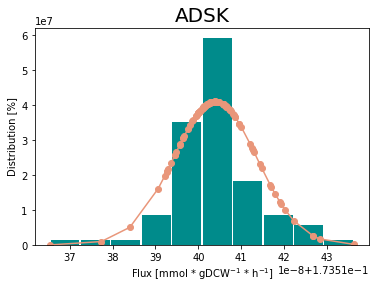

In [39]:
plot_sampled_reaction_fluxes(relaxed_sampled_fluxes, reactions, reaction_id=0)

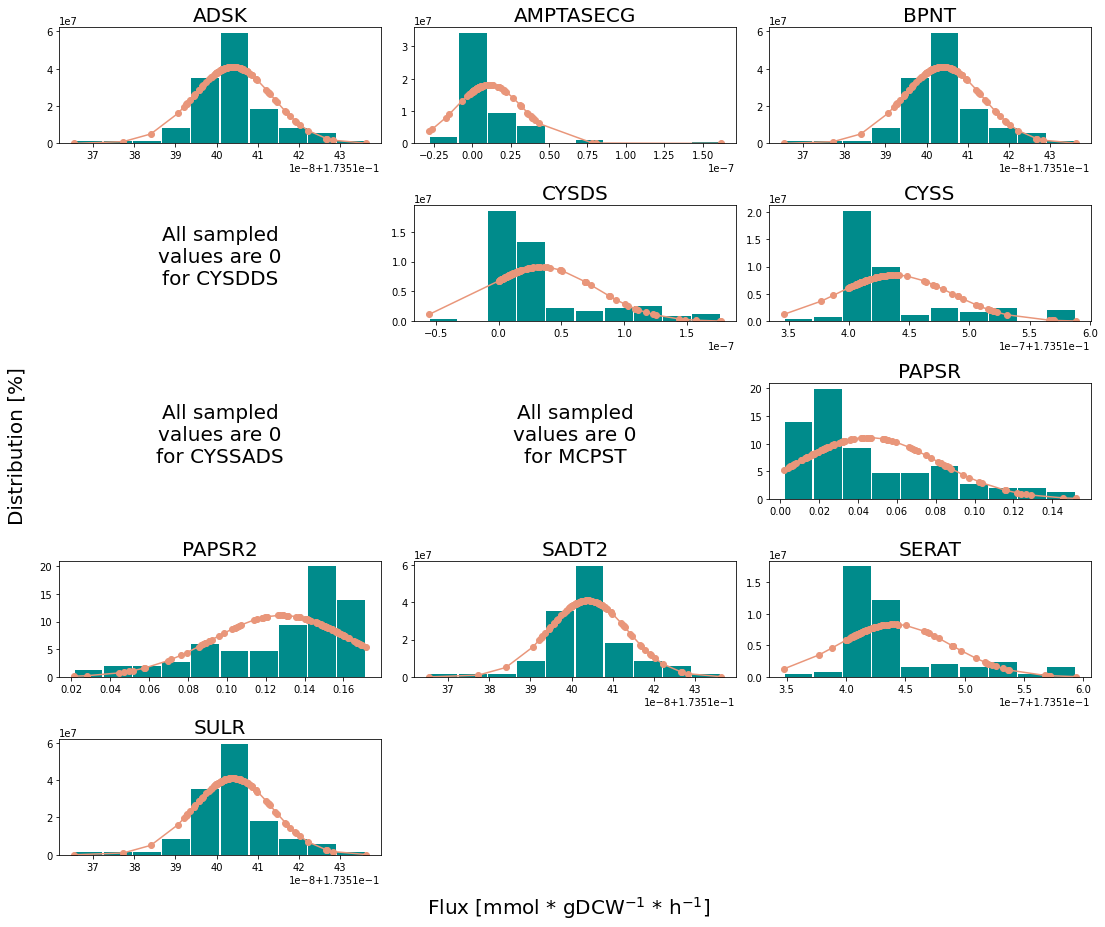

In [40]:
fig = plot_all_subsystem_fluxes(relaxed_sampled_fluxes, reactions, bins=10)

## Adding a box and whiskers or similar for several reactions of interest to visualize the distribution of points

In [41]:
show_subsystems(model)

0: Extracellular exchange
1: Intracellular demand
2: Biomass and maintenance functions
3: Transport, Inner Membrane
4: Transport, Outer Membrane Porin
5: Transport, Outer Membrane
6: Nucleotide Salvage Pathway
7: Glycerophospholipid Metabolism
8: Alternate Carbon Metabolism
9: Cofactor and Prosthetic Group Biosynthesis
10: Cell Envelope Biosynthesis
11: Methylglyoxal Metabolism
12: Arginine and Proline Metabolism
13: Membrane Lipid Metabolism
14: Pyruvate Metabolism
15: Tyrosine, Tryptophan, and Phenylalanine Metabolism
16: Murein Recycling
17: Valine, Leucine, and Isoleucine Metabolism
18: Nitrogen Metabolism
19: Lipopolysaccharide Biosynthesis / Recycling
20: Unassigned
21: Citric Acid Cycle
22: Inorganic Ion Transport and Metabolism
23: Methionine Metabolism
24: Purine and Pyrimidine Biosynthesis
25: Alanine and Aspartate Metabolism
26: tRNA Charging
27: Cysteine Metabolism
28: Threonine and Lysine Metabolism
29: Histidine Metabolism
30: Oxidative Phosphorylation
31: Glycine and Ser

In [42]:
reduced_relaxed_sampled_fluxes = sampled_fluxes_minrange(relaxed_sampled_fluxes, min_val=-1, max_val=1)

In [43]:
reduced_relaxed_sampled_fluxes

,EX_co2_e,EX_glc__D_e,EX_h_e,EX_h2o_e,EX_ac_e,EX_nh4_e,EX_o2_e,EX_fe2_e,EX_fe3_e,ABUTt2pp,...,THMDt2pp_copy1,TRPAS2,TRPS2,THMDt2pp_copy2,TRSARr,URIt2pp_copy1,URIt2pp_copy2,VALTA,URAt2pp_copy1,URAt2pp_copy2
0,20.755532,-10.0,-914.594290,502.383042,5.255299,-7.560577,-250.832135,-926.292594,926.281351,117.879443,...,938.497874,1.022677,1.026324,-938.497874,-914.120286,929.689682,-929.689682,-1.096150,929.870295,-929.870295
1,20.755532,-10.0,-768.215707,429.193751,5.255299,-7.560577,-214.237490,-779.914011,779.902768,267.158857,...,882.123792,1.481133,1.489562,-882.123792,-784.289910,797.395819,-797.395819,-1.086558,833.953979,-833.953979
2,20.755532,-10.0,-663.448388,376.810092,5.255299,-7.560577,-188.045660,-675.146692,675.135450,47.257913,...,771.863073,3.537148,3.550885,-771.863073,-559.212842,582.433304,-582.433304,-1.075328,721.649662,-721.649662
3,20.755532,-10.0,-669.173600,379.672697,5.255299,-7.560577,-189.476963,-680.871904,680.860662,316.976275,...,667.319202,2.637665,2.660388,-667.319202,-783.573092,825.589950,-825.589950,-1.086105,829.425595,-829.425595
4,20.755532,-10.0,-631.610530,360.891162,5.255299,-7.560577,-180.086195,-643.308834,643.297591,149.972936,...,560.018036,3.932077,3.951830,-560.018036,-674.993593,683.518190,-683.518190,-1.061648,584.852014,-584.852014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,20.755532,-10.0,-410.175098,250.173446,5.255299,-7.560577,-124.727337,-421.873403,421.862160,195.898728,...,526.195986,2.744671,2.769414,-526.195986,-533.550413,522.314442,-522.314442,-1.055388,522.249430,-522.249430
96,20.755532,-10.0,-661.365155,375.768475,5.255299,-7.560577,-187.524852,-673.063460,673.052217,237.925136,...,647.932372,0.039938,0.060855,-647.932372,-638.891331,656.419842,-656.419842,-1.073130,699.675401,-699.675401
97,20.755532,-10.0,-562.173949,326.172872,5.255299,-7.560577,-162.727050,-573.872254,573.861011,219.732291,...,236.442355,1.906661,1.935446,-236.442355,-581.490363,621.747925,-621.747925,-1.069494,663.315987,-663.315987
98,20.755532,-10.0,-709.810861,399.991328,5.255299,-7.560577,-199.636278,-721.509165,721.497922,483.765589,...,522.985838,2.445599,2.462313,-522.985838,-868.879013,879.779790,-879.779790,-1.095297,921.340304,-921.340304


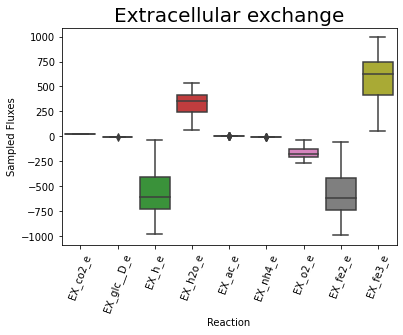

In [148]:
plot_subsystem_fluxes(model, reduced_relaxed_sampled_fluxes, subsystem_id=0, no_zero_cols=True)

## Calculating the flux splits at key branch points (e.g., glycolysis vs. PPP, TCA vs. acetate secretion, glyoxylate shunt vs. full TCA, etc.)

In [ ]:
def _prepare_input_fluxes(sampled_fluxes, flux):
    if isinstance(flux, pd.Series):
        return flux
    elif isinstance(flux, str):
        flux = sampled_fluxes[flux]
        return flux
    else:
        raise TypeError(
            f"The input is a '{type(flux)}', this type of object"
            " cannot be used here, please provide a pd.Series or"
            "a column identifier (string)")

In [196]:
def calculate_split_ratio(sampled_fluxes, influx, split_flux1, split_flux2=None, branch_point_name="Branch point"):
    influx = _prepare_input_fluxes(sampled_fluxes, influx)
    split_flux1 = _prepare_input_fluxes(sampled_fluxes, split_flux1)
    mean_list = [np.abs(np.mean(split_flux1 / influx))]
    stdev_list = [np.std(split_flux1 / influx)]
    index_list = [influx.name + '/' + split_flux1.name]
    if split_flux2 is not None:
        split_flux2 = _prepare_input(sampled_fluxes, split_flux2)
        mean_list.append(np.abs(np.mean(split_flux2 / influx)))
        stdev_list.append(np.std(split_flux2 / influx))
        index_list.append(influx.name + '/' + split_flux2.name)
    fluxes = {'Mean': mean_list,
        'Stdev': stdev_list,
        }    
    output_df = pd.DataFrame(fluxes, columns = ['Mean','Stdev'], index = [index_list])
    return output_df

In [242]:
def plot_split_ratio(sampled_fluxes, influx, split_flux1, split_flux2=None, branch_point_name="Branch point"):
    influx = _prepare_input(sampled_fluxes, influx)
    split_flux1 = _prepare_input(sampled_fluxes, split_flux1)
    if split_flux2 is not None:
        split_flux2 = _prepare_input(sampled_fluxes, split_flux2)
        sum_ratios = abs(split_flux1 / influx) + abs(split_flux2 / influx)
        split_df = pd.DataFrame({
            'Sum': sum_ratios,
            split_flux1.name: abs(split_flux1 / influx),
            split_flux2.name: abs(split_flux2 / influx),
        })
        plot_title = f'{influx.name} / {split_flux1.name} vs.\n{influx.name} / {split_flux2.name}'
    else:
        split_df = pd.DataFrame({
            split_flux1.name: abs(split_flux1 / influx),
        })
        plot_title = f'{influx.name} / {split_flux1.name}'
    
    
    re_arranged_df = _reduce_sampled_fluxes(split_df, split_df.columns)

    fig = sns.boxplot(x="Reaction", y="Sampled Fluxes", data=re_arranged_df, orient = 'v')
    plt.xticks(rotation=70)
    plt.title(f'{branch_point_name}:\n{plot_title}', size = 15)

- Glycolysis/PPP: `EX_glc__D` compared to `PGI` and `G6PDH2r`
- Glyoxylate shunt/full TCA: `ACONTb` compared to `ICDHyr` and `ICL`
- TCA/acetate secretion: (`ACALD`, `PFL`, `PDH`) compared to `PTAr` and `CS`

,Mean,Stdev
EX_glc__D_e/G6PDH2r,0.988812,7.998960e-08
EX_glc__D_e/PGI,0.003877,2.629929e-03


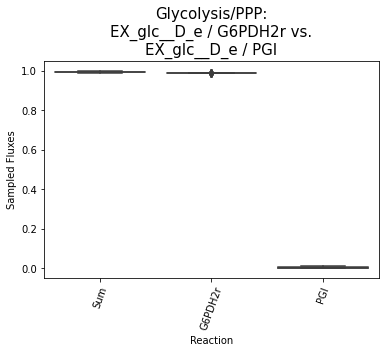

In [45]:
plot_split_ratio(relaxed_sampled_fluxes, 'EX_glc__D_e', 'G6PDH2r', 'PGI', branch_point_name="Glycolysis/PPP")
calculate_split_ratio(relaxed_sampled_fluxes, 'EX_glc__D_e', 'G6PDH2r', 'PGI', branch_point_name="Glycolysis/PPP")

,Mean,Stdev
ACONTb/ICDHyr,0.676887,0.001614
ACONTb/ICL,0.323113,0.001614


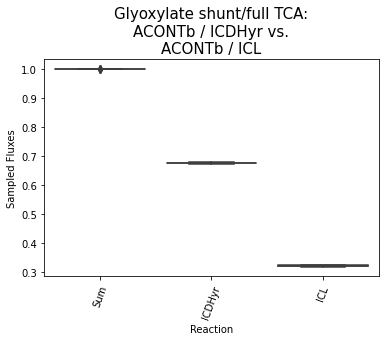

In [46]:
plot_split_ratio(relaxed_sampled_fluxes, 'ACONTb', 'ICDHyr', 'ICL', branch_point_name="Glyoxylate shunt/full TCA")
calculate_split_ratio(relaxed_sampled_fluxes, 'ACONTb', 'ICDHyr', 'ICL', branch_point_name="Glyoxylate shunt/full TCA")

,Mean,Stdev
Glycolysis/PTAr,31.830294,18.158815
Glycolysis/CS,0.308727,0.000154


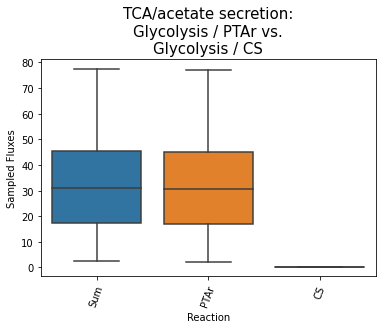

In [47]:
glycolysis = abs(relaxed_sampled_fluxes['ACALD']) + abs(relaxed_sampled_fluxes['PFL']) + abs(relaxed_sampled_fluxes['PDH'])
glycolysis.name = 'Glycolysis'
plot_split_ratio(relaxed_sampled_fluxes, glycolysis, 'PTAr', 'CS', branch_point_name="TCA/acetate secretion")
calculate_split_ratio(relaxed_sampled_fluxes, glycolysis, 'PTAr', 'CS', branch_point_name="TCA/acetate secretion")

## Calculating the flux resolution

https://reader.elsevier.com/reader/sd/pii/S1096717606000061?token=ABD4DD7567D8BD2D43763248F50716CABA5FEDC3C7E8370AE6F3C514A790D6953F5CCCF7FE22A552BE858AE61F065706&originRegion=eu-west-1&originCreation=20210426154011

In [150]:
relaxed_sampled_fluxes

,EX_cm_e,EX_cmp_e,EX_co2_e,EX_cobalt2_e,DM_4crsol_c,DM_5drib_c,DM_aacald_c,DM_amob_c,DM_mththf_c,EX_colipa_e,...,UREAtex,RNDR2b,UREAtpp,RNDR3,RNDR3b,RNDR4,RNDR4b,RNTR1c2,RNTR2c2,RNTR3c2
0,0.0,0.0,20.755532,-0.000017,0.000156,0.000158,0.0,0.000001,0.000314,5.837613e-13,...,0.0,3.525931e-13,0.0,0.0,0.0,0.0,0.0,0.018316,0.018912,0.018912
1,0.0,0.0,20.755532,-0.000018,0.000156,0.000158,0.0,0.000001,0.000314,-5.055637e-12,...,0.0,1.353922e-10,0.0,0.0,0.0,0.0,0.0,0.018316,0.018912,0.018912
2,0.0,0.0,20.755532,-0.000017,0.000156,0.000158,0.0,0.000001,0.000314,2.954157e-12,...,0.0,4.485964e-08,0.0,0.0,0.0,0.0,0.0,0.018316,0.018912,0.018912
3,0.0,0.0,20.755532,-0.000018,0.000156,0.000157,0.0,0.000001,0.000314,-2.627383e-12,...,0.0,1.485486e-08,0.0,0.0,0.0,0.0,0.0,0.018316,0.018912,0.018912
4,0.0,0.0,20.755532,-0.000018,0.000156,0.000157,0.0,0.000001,0.000314,-3.516136e-12,...,0.0,5.196562e-08,0.0,0.0,0.0,0.0,0.0,0.018316,0.018912,0.018912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,20.755532,-0.000018,0.000156,0.000157,0.0,0.000001,0.000314,-2.286222e-12,...,0.0,1.234154e-08,0.0,0.0,0.0,0.0,0.0,0.018316,0.018912,0.018912
96,0.0,0.0,20.755532,-0.000018,0.000156,0.000157,0.0,0.000001,0.000314,-3.381502e-12,...,0.0,2.177279e-08,0.0,0.0,0.0,0.0,0.0,0.018316,0.018912,0.018912
97,0.0,0.0,20.755532,-0.000018,0.000156,0.000157,0.0,0.000001,0.000314,-3.383948e-12,...,0.0,1.004514e-07,0.0,0.0,0.0,0.0,0.0,0.018316,0.018912,0.018912
98,0.0,0.0,20.755532,-0.000017,0.000156,0.000157,0.0,0.000001,0.000314,6.536094e-12,...,0.0,1.832333e-07,0.0,0.0,0.0,0.0,0.0,0.018316,0.018912,0.018912


In [94]:
def get_observable_fluxes(fittedFluxes):
    big_enough_fluxes = fittedFluxes[fittedFluxes['flux'] / (fittedFluxes['flux_ub'] - fittedFluxes['flux_lb']) >= 4]
    lb_below_0 = big_enough_fluxes['flux_lb'] < 0
    ub_above_0 = 0 < big_enough_fluxes['flux_lb']
    observable_fluxes = big_enough_fluxes[~(lb_below_0 & ub_above_0)]
    return observable_fluxes

In [97]:
observable_fluxes = get_observable_fluxes(fittedFluxes)

In [117]:
def percent_observable_fluxes(fittedFluxes):
    return ((len(get_observable_fluxes(fittedFluxes)) / len(fittedFluxes)) * 100)

In [118]:
percent_observable_fluxes(fittedFluxes)

27.835051546391753

In [119]:
print(round(percent_observable_fluxes(fittedFluxes), 2), '%')

27.84 %


In [107]:
def get_flux_precision(fittedFluxes):
    return get_observable_fluxes(fittedFluxes)['flux_stdev'].mean()

In [108]:
get_flux_precision(fittedFluxes)

0.03240222550327188

## Calculating the exchange fluxes and determining what forward and reverse fluxes can be differentiated.

In [187]:
from cobra.sampling import OptGPSampler
with model:
    sampler = OptGPSampler(model=model, processes=2)
    sampler_warmup = sampler.warmup
    sampler_problem_variable_fixed = sampler.problem.variable_fixed
    #sampled_OptGP_fluxes = sampler.sample(n=10, fluxes=False)

Read LP format model from file /var/folders/mb/7cs2dcbn369_w97fqkfx47brjcxl49/T/tmpspqdiv6c.lp
Reading time = 0.03 seconds
: 1805 rows, 5166 columns, 20366 nonzeros
Read LP format model from file /var/folders/mb/7cs2dcbn369_w97fqkfx47brjcxl49/T/tmp6kxtsnaa.lp
Reading time = 0.02 seconds
: 1805 rows, 5166 columns, 20366 nonzeros


In [188]:
sampler_problem_variable_fixed

array([1, 1, 0, ..., 1, 0, 1])

In [180]:
for flux in sampled_OptGP_fluxes.columns:
    if '_reverse_' in flux:
        print(sampled_OptGP_fluxes[flux])

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: BIOMASS_Ec_iJO1366_core_53p95M_reverse_5c8b1, dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: BIOMASS_Ec_iJO1366_WT_53p95M_reverse_06c4a, dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: AICART_reverse_b7b59, dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: FMETTRS_reverse_3b6c6, dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: FTHFD_reverse_44321, dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: FTHFLi_reverse_a6dc7, dtype: float64
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: GARFT_reverse_7ecb6, dtype: float64
0    0.0
1    0.0
2    0

In [157]:
for i, flux in enumerate(fittedFluxes['rxn_id']):
    if '_reverse' in flux:
        print(fittedFluxes['rxn_id'][i-1])
        print(flux)

ACONTa_ACONTb
ACONTa_ACONTb_reverse
FBA
FBA_reverse
FUM
FUM_reverse
GAPD_PGK
GAPD_PGK_reverse
GHMT2r
GHMT2r_reverse
ICDHyr
ICDHyr_reverse
MDH
MDH_reverse
MlthfSYN
MlthfSYN_reverse
NADTRHD_THD2pp
NADTRHD_THD2pp_reverse
PGI
PGI_reverse
PGM
PGM_reverse
PTAr_ACKr_ACS
PTAr_ACKr_ACS_reverse
RPE
RPE_reverse
RPI
RPI_reverse
SUCCOAS
SUCCOAS_reverse
SUCDi
SUCDi_reverse
TALA
TALA_reverse
TKT1a
TKT1a_reverse
TKT1b
TKT1b_reverse
TKT2a
TKT2a_reverse
TKT2b
TKT2b_reverse
TPI
TPI_reverse


Here we jump into the (for now) final step in our metabolic flux analysis (MFA) pipeline. After constructing an INCA script, running it in MATLAB and reimporting the data we're now here. This example notebook will guide you through different ways to integrate your MFA results into COBRA models and how to make them more reliable.

In [1]:
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import escher
import cobra
from tabulate import tabulate
from gurobipy import Model as GRBModel
import re
from BFAIR.INCA import INCA_reimport
from BFAIR.INCA.sampling import (
    add_constraints,
    find_biomass_reaction,
    get_min_solution_val,
    replace_biomass_rxn_name,
    add_feasible_constraints,
    reshape_fluxes_escher,
    bound_relaxation,
)
from BFAIR.INCA.plotting import (
    sampled_fluxes_minrange,
    show_reactions,
    plot_sampled_reaction_fluxes,
    plot_all_subsystem_fluxes,
    get_subsytem_reactions,
    show_subsystems,
    plot_subsystem_fluxes,
    calculate_split_ratio,
    plot_split_ratio,
)

Determination of memory status is not supported on this 
 platform, measuring for memoryleaks will never fail


#### INCA re-import

First, let's reimport the data using our `BFAIR INCA_reimport` tools

In [2]:
filename = 'data/MFA_modelInputsData/TestFile.mat'
simulation_info = pd.read_csv('data/MFA_modelInputsData/Re-import/experimentalMS_data_I.csv')
simulation_id = 'WTEColi_113C80_U13C20_01'

Here we re-import the INCA output

In [233]:
reimport_data = INCA_reimport()
(fittedData,
 fittedFluxes,
 fittedFragments,
 fittedMeasuredFluxes,
 fittedMeasuredFragments,
 fittedMeasuredFluxResiduals,
 fittedMeasuredFragmentResiduals,
 simulationParameters) = reimport_data.reimport(
    filename,
    simulation_info,
    simulation_id
)

In [234]:
fittedFluxes

,simulation_id,simulation_dateAndTime,rxn_id,flux,flux_stdev,flux_lb,flux_ub,flux_units,fit_alf,fit_chi2s,fit_cor,fit_cov,free,used_,comment_
0,WTEColi_113C80_U13C20_01,2021-04-16 18:29:37,26dap_DASH_MSYN,2.295040e-01,0.002608,0.224392,0.234616,mmol*gDCW-1*hr-1,0.05,None,None,None,False,True,None
1,WTEColi_113C80_U13C20_01,2021-04-16 18:29:37,ACONTa_ACONTb,2.074886e+00,16996.864976,1.185984,1000.000000,mmol*gDCW-1*hr-1,0.05,None,None,None,False,True,None
2,WTEColi_113C80_U13C20_01,2021-04-16 18:29:37,ACONTa_ACONTb_reverse,8.690514e-07,15432.592032,0.000000,28.927600,mmol*gDCW-1*hr-1,0.05,None,None,None,True,True,None
3,WTEColi_113C80_U13C20_01,2021-04-16 18:29:37,AKGDH,1.423617e-01,7673.615592,0.000000,1.919800,mmol*gDCW-1*hr-1,0.05,None,None,None,False,True,None
4,WTEColi_113C80_U13C20_01,2021-04-16 18:29:37,ALATA_L,3.435520e-01,0.003904,0.335900,0.351204,mmol*gDCW-1*hr-1,0.05,None,None,None,False,True,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,WTEColi_113C80_U13C20_01,2021-04-16 18:29:37,TPI,2.175603e+00,25620.656341,0.000000,1000.000000,mmol*gDCW-1*hr-1,0.05,None,None,None,False,True,None
93,WTEColi_113C80_U13C20_01,2021-04-16 18:29:37,TPI_reverse,8.689299e-07,24739.593649,0.000000,1000.000000,mmol*gDCW-1*hr-1,0.05,None,None,None,True,True,None
94,WTEColi_113C80_U13C20_01,2021-04-16 18:29:37,TrpSYN,3.801600e-02,0.000432,0.037169,0.038863,mmol*gDCW-1*hr-1,0.05,None,None,None,False,True,None
95,WTEColi_113C80_U13C20_01,2021-04-16 18:29:37,TyrSYN,9.222400e-02,0.001048,0.090170,0.094278,mmol*gDCW-1*hr-1,0.05,None,None,None,False,True,None


Here we import the model

In [235]:
model = cobra.io.load_json_model('data/FIA_MS_example/database_files/iJO1366.json')

Now let's have a quick look at the reaction names in our model and in our MFA simulation. We used a reduced model from a different source for the MFA than we are using now. That's asking for trouble.

In [236]:
model_rxns = []
for rxn in model.reactions:
    model_rxns.append(rxn.id)
#model_rxns

In [237]:
INCA_rxns = fittedFluxes['rxn_id']

In [238]:
def model_rxn_overlap(INCA_df, model):
    model_rxns = []
    for rxn in model.reactions:
        model_rxns.append(rxn.id)
    INCA_rxns = INCA_df['rxn_id']
    mask = []
    for rxn in INCA_rxns:
        if rxn in model_rxns:
            mask.append(False)
        else:
            mask.append(True)
    return INCA_rxns[mask]

In [239]:
def rxn_coverage(fittedFluxes, model):
    print(round((len(model_rxn_overlap(
        fittedFluxes, model)) / len(fittedFluxes))
                , 2) * 100, '%')

In [240]:
rxn_coverage(fittedFluxes, model)

61.0 %


61 % of all the reimported reactions have non-overlapping names with the model we want to use for simulations! That a bit much. Let's do something about that

First, let's find the name of the biomass reaction in the model and replace the one in our data with it

In [241]:
find_biomass_reaction(model)

['BIOMASS_Ec_iJO1366_WT_53p95M', 'BIOMASS_Ec_iJO1366_core_53p95M']

This model has two biomass reactions, a full and a reduced core biomass reaction. In the summary we can see that the core biomass reaction is the assigned objective function, so we will reassign this name to our biomass function

In [242]:
model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
ca2_e,EX_ca2_e,0.005113,0,0.00%
cl_e,EX_cl_e,0.005113,0,0.00%
cobalt2_e,EX_cobalt2_e,2.456E-05,0,0.00%
cu2_e,EX_cu2_e,0.0006965,0,0.00%
fe2_e,EX_fe2_e,0.01578,0,0.00%
glc__D_e,EX_glc__D_e,10,6,100.00%
k_e,EX_k_e,0.1918,0,0.00%
mg2_e,EX_mg2_e,0.008522,0,0.00%
mn2_e,EX_mn2_e,0.0006788,0,0.00%
mobd_e,EX_mobd_e,0.0001267,0,0.00%


In [243]:
fittedFluxes = replace_biomass_rxn_name(fittedFluxes, biomass_string='Biomass', biomass_rxn_name='BIOMASS_Ec_iJO1366_core_53p95M')

Next step, adjust the names of our MFA data so that they can be assigned to our model's reactions

In [244]:
model_rxn_overlap(fittedFluxes, model)

0                       26dap_DASH_MSYN
1                         ACONTa_ACONTb
2                 ACONTa_ACONTb_reverse
5                                ArgSYN
14               EX_ac_LPAREN_e_RPAREN_
15              EX_co2_LPAREN_e_RPAREN_
16    EX_co2_LPAREN_e_RPAREN__unlabeled
17              EX_glc_LPAREN_e_RPAREN_
18              EX_nh4_LPAREN_e_RPAREN_
19               EX_o2_LPAREN_e_RPAREN_
20              EX_so4_LPAREN_e_RPAREN_
21           FADR_NADH_CYTBD_HYD_ATPS4r
23                          FBA_reverse
25                          FUM_reverse
26                          G6PDH2r_PGL
27                             GAPD_PGK
28                     GAPD_PGK_reverse
30                       GHMT2r_reverse
34                               GluSYN
37                               HisSYN
39                       ICDHyr_reverse
41                               IleSYN
42                               LeuSYN
45                          MDH_reverse
48                               MetSYN


Observations: 
1) probably all `_reverse` reactions could not be assigned
2) some reaction names include more than one metabolite
3) many unassigned amino acids end with `SYN` and
4) some exchange reactions include `LPAREN_` and `RPAREN_`. Let's try to do something about that

1) Reverse. Let's check if the forward and reverse fluxes are actually separate. If not, then the two of them will define the bounds together. If they are, then we should add new reverse reactions to the model.

In [245]:
reverse_rxns = {}
for cnt, rxn in enumerate(fittedFluxes['rxn_id']):
    if '_reverse' in rxn:
        reverse_rxns[cnt] = {
            'forward': re.match(".+?(?=_reverse)", rxn)[0],
            'reverse': rxn,
        }
reverse_rxns = pd.DataFrame.from_dict(reverse_rxns, "index")

In [246]:
reverse_rxns

,forward,reverse
2,ACONTa_ACONTb,ACONTa_ACONTb_reverse
23,FBA,FBA_reverse
25,FUM,FUM_reverse
28,GAPD_PGK,GAPD_PGK_reverse
30,GHMT2r,GHMT2r_reverse
39,ICDHyr,ICDHyr_reverse
45,MDH,MDH_reverse
50,MlthfSYN,MlthfSYN_reverse
55,NADTRHD_THD2pp,NADTRHD_THD2pp_reverse
59,PGI,PGI_reverse


In [247]:
def overlaps(a, b):
    """
    Return the amount of overlap, between a and b.
    If >0, how much they overlap
    If 0,  they are book-ended.
    If <0, distance
    
    Parameters
    ----------
        a, b : list
            lists of two numerals denoting the boarders of ranges

    Returns
    -------
        overlap : float
            overlap as described above
    
    """

    return min(a[1], b[1]) - max(a[0], b[0])

In [248]:
for _, row in reverse_rxns.iterrows():
    fittedFluxes_forward = fittedFluxes[fittedFluxes['rxn_id'] == row[0]]
    forward_lb = fittedFluxes_forward['flux_lb'].values[0]
    forward_ub = fittedFluxes_forward['flux_ub'].values[0]
    forward = [forward_lb, forward_ub]
    fittedFluxes_reverse = fittedFluxes[fittedFluxes['rxn_id'] == row[1]]
    reverse_lb = fittedFluxes_reverse['flux_lb'].values[0]
    reverse_ub = fittedFluxes_reverse['flux_ub'].values[0]
    reverse = [-reverse_ub, -reverse_lb]
    if overlaps(forward, reverse) == 0:
        print('They overlap, adjust bounds of net function for:', row[0])
        print('ub = forward_ub, lb = -reverse_ub')
        # index of reverse reaction
        fittedFluxes.at[fittedFluxes_forward.index[0], 'flux_lb'] = - fittedFluxes.at[fittedFluxes_reverse.index[0], 'flux_ub']
        fittedFluxes = fittedFluxes.drop(fittedFluxes_reverse.index[0])
    else:
        print('These reactions need to be split into two:', row[0])

These reactions need to be split into two: ACONTa_ACONTb
They overlap, adjust bounds of net function for: FBA
ub = forward_ub, lb = -reverse_ub
These reactions need to be split into two: FUM
These reactions need to be split into two: GAPD_PGK
They overlap, adjust bounds of net function for: GHMT2r
ub = forward_ub, lb = -reverse_ub
These reactions need to be split into two: ICDHyr
They overlap, adjust bounds of net function for: MDH
ub = forward_ub, lb = -reverse_ub
These reactions need to be split into two: MlthfSYN
They overlap, adjust bounds of net function for: NADTRHD_THD2pp
ub = forward_ub, lb = -reverse_ub
They overlap, adjust bounds of net function for: PGI
ub = forward_ub, lb = -reverse_ub
These reactions need to be split into two: PGM
These reactions need to be split into two: PTAr_ACKr_ACS
They overlap, adjust bounds of net function for: RPE
ub = forward_ub, lb = -reverse_ub
They overlap, adjust bounds of net function for: RPI
ub = forward_ub, lb = -reverse_ub
They overlap, a

In [249]:
fittedFluxes = fittedFluxes.reset_index()

In [250]:
fittedFluxes

,index,simulation_id,simulation_dateAndTime,rxn_id,flux,flux_stdev,flux_lb,flux_ub,flux_units,fit_alf,fit_chi2s,fit_cor,fit_cov,free,used_,comment_
0,0,WTEColi_113C80_U13C20_01,2021-04-16 18:29:37,26dap_DASH_MSYN,2.295040e-01,2.607999e-03,0.224392,0.234616,mmol*gDCW-1*hr-1,0.05,None,None,None,False,True,None
1,1,WTEColi_113C80_U13C20_01,2021-04-16 18:29:37,ACONTa_ACONTb,2.074886e+00,1.699686e+04,1.185984,1000.000000,mmol*gDCW-1*hr-1,0.05,None,None,None,False,True,None
2,2,WTEColi_113C80_U13C20_01,2021-04-16 18:29:37,ACONTa_ACONTb_reverse,8.690514e-07,1.543259e+04,0.000000,28.927600,mmol*gDCW-1*hr-1,0.05,None,None,None,True,True,None
3,3,WTEColi_113C80_U13C20_01,2021-04-16 18:29:37,AKGDH,1.423617e-01,7.673616e+03,0.000000,1.919800,mmol*gDCW-1*hr-1,0.05,None,None,None,False,True,None
4,4,WTEColi_113C80_U13C20_01,2021-04-16 18:29:37,ALATA_L,3.435520e-01,3.904002e-03,0.335900,0.351204,mmol*gDCW-1*hr-1,0.05,None,None,None,False,True,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,90,WTEColi_113C80_U13C20_01,2021-04-16 18:29:37,TKT2b,1.000000e-07,2.273901e-11,-1000.000000,0.807422,mmol*gDCW-1*hr-1,0.05,None,None,None,False,True,None
78,92,WTEColi_113C80_U13C20_01,2021-04-16 18:29:37,TPI,2.175603e+00,2.562066e+04,-1000.000000,1000.000000,mmol*gDCW-1*hr-1,0.05,None,None,None,False,True,None
79,94,WTEColi_113C80_U13C20_01,2021-04-16 18:29:37,TrpSYN,3.801600e-02,4.320001e-04,0.037169,0.038863,mmol*gDCW-1*hr-1,0.05,None,None,None,False,True,None
80,95,WTEColi_113C80_U13C20_01,2021-04-16 18:29:37,TyrSYN,9.222400e-02,1.048002e-03,0.090170,0.094278,mmol*gDCW-1*hr-1,0.05,None,None,None,False,True,None


2) Split the lumped reactions and give all of them the same bounds

So let's pick the ones we want. Let's ignore the reverse reactions for now

In [251]:
model_rxn_overlap(fittedFluxes, model)

0                       26dap_DASH_MSYN
1                         ACONTa_ACONTb
2                 ACONTa_ACONTb_reverse
5                                ArgSYN
14               EX_ac_LPAREN_e_RPAREN_
15              EX_co2_LPAREN_e_RPAREN_
16    EX_co2_LPAREN_e_RPAREN__unlabeled
17              EX_glc_LPAREN_e_RPAREN_
18              EX_nh4_LPAREN_e_RPAREN_
19               EX_o2_LPAREN_e_RPAREN_
20              EX_so4_LPAREN_e_RPAREN_
21           FADR_NADH_CYTBD_HYD_ATPS4r
24                          FUM_reverse
25                          G6PDH2r_PGL
26                             GAPD_PGK
27                     GAPD_PGK_reverse
32                               GluSYN
35                               HisSYN
37                       ICDHyr_reverse
39                               IleSYN
40                               LeuSYN
45                               MetSYN
46                             MlthfSYN
47                     MlthfSYN_reverse
50                NADH_CYTBD_HYD_ATPS4r


In [252]:
lumped_ids = [1, 21, 25, 26, 50, 51, 62, 67, 72]
mask = []
for i in model_rxn_overlap(fittedFluxes, model).iteritems():
    if i[0] in lumped_ids:
        mask.append(True)
    else:
        mask.append(False)

In [253]:
def split_lumped_rxns(lumped_rxns, fittedFluxes):
    for rxn in lumped_rxns:
        split_names = rxn.split('_')
        for index, split_name in enumerate(split_names):
            if index == 0:
                df_row_index = list(fittedFluxes['rxn_id']).index(rxn)
                row = fittedFluxes.iloc[df_row_index]
                fittedFluxes.at[df_row_index, 'rxn_id'] = split_name
                df_row_index = list(fittedFluxes['rxn_id']).index(split_name)
            else:
                row = fittedFluxes.iloc[df_row_index]
                fittedFluxes = fittedFluxes.append(row, ignore_index=True)
                fittedFluxes.at[len(fittedFluxes) - 1, 'rxn_id'] = split_name
    return fittedFluxes

In [254]:
lumped_rxns = model_rxn_overlap(fittedFluxes, model)[mask]
fittedFluxes = split_lumped_rxns(lumped_rxns, fittedFluxes)

In [255]:
lumped_reverse_ids = [2, 27, 63]
mask_reverse = []
for i in model_rxn_overlap(fittedFluxes, model).iteritems():
    if i[0] in lumped_reverse_ids:
        mask_reverse.append(True)
    else:
        mask_reverse.append(False)

In [256]:
def split_lumped_reverse_rxns(lumped_reverse_rxns, fittedFluxes):
    for rxn in lumped_reverse_rxns:
        print(rxn)
        name = re.match(".+?(?=_reverse)", rxn)[0]
        split_names = name.split('_')
        for index, split_name in enumerate(split_names):
            if index == 0:
                df_row_index = list(fittedFluxes['rxn_id']).index(rxn)
                row = fittedFluxes.iloc[df_row_index]
                fittedFluxes.at[df_row_index, 'rxn_id'] = split_name + '_reverse'
                df_row_index = list(fittedFluxes['rxn_id']).index(split_name + '_reverse')
            else:
                row = fittedFluxes.iloc[df_row_index]
                fittedFluxes = fittedFluxes.append(row, ignore_index=True)
                fittedFluxes.at[len(fittedFluxes) - 1, 'rxn_id'] = split_name + '_reverse'
    return fittedFluxes

In [257]:
model_rxn_overlap(fittedFluxes, model)

0                       26dap_DASH_MSYN
2                 ACONTa_ACONTb_reverse
5                                ArgSYN
14               EX_ac_LPAREN_e_RPAREN_
15              EX_co2_LPAREN_e_RPAREN_
16    EX_co2_LPAREN_e_RPAREN__unlabeled
17              EX_glc_LPAREN_e_RPAREN_
18              EX_nh4_LPAREN_e_RPAREN_
19               EX_o2_LPAREN_e_RPAREN_
20              EX_so4_LPAREN_e_RPAREN_
21                                 FADR
24                          FUM_reverse
27                     GAPD_PGK_reverse
32                               GluSYN
35                               HisSYN
37                       ICDHyr_reverse
39                               IleSYN
40                               LeuSYN
45                               MetSYN
46                             MlthfSYN
47                     MlthfSYN_reverse
50                                 NADH
56                          PGM_reverse
57                               PheSYN
60                               ProSYN


In [258]:
lumped_reverse_rxns = model_rxn_overlap(fittedFluxes, model)[mask_reverse]
fittedFluxes = split_lumped_reverse_rxns(lumped_reverse_rxns, fittedFluxes)

ACONTa_ACONTb_reverse
GAPD_PGK_reverse
PTAr_ACKr_ACS_reverse


Let's check the overlap again

In [259]:
model_rxn_overlap(fittedFluxes, model)

0                        26dap_DASH_MSYN
2                         ACONTa_reverse
5                                 ArgSYN
14                EX_ac_LPAREN_e_RPAREN_
15               EX_co2_LPAREN_e_RPAREN_
16     EX_co2_LPAREN_e_RPAREN__unlabeled
17               EX_glc_LPAREN_e_RPAREN_
18               EX_nh4_LPAREN_e_RPAREN_
19                EX_o2_LPAREN_e_RPAREN_
20               EX_so4_LPAREN_e_RPAREN_
21                                  FADR
24                           FUM_reverse
27                          GAPD_reverse
32                                GluSYN
35                                HisSYN
37                        ICDHyr_reverse
39                                IleSYN
40                                LeuSYN
45                                MetSYN
46                              MlthfSYN
47                      MlthfSYN_reverse
50                                  NADH
56                           PGM_reverse
57                                PheSYN
60              

In [260]:
rxn_coverage(fittedFluxes, model)

47.0 %


3) SYN, these reactions might be lumped; let's investigate!

In [261]:
for rxn in model.reactions:
    if 'ARG' in rxn.id:
        print(rxn.id)

ARGAGMt7pp
ARGDC
ARGDCpp
ARGORNt7pp
ARGSL
ARGSS
ARGTRS
ARGabcpp
ARGt3pp
ARGtex


Yeah I guess so... This sucks, not sure of we can do anything about that

4) Let's remove the extra bits in the exchange reaction strings

In [262]:
for i, row in fittedFluxes.iterrows():
    if 'LPAREN_' in row['rxn_id']:
        fittedFluxes.at[i, 'rxn_id'] = row['rxn_id'].replace('LPAREN_', '').replace('_RPAREN_', '')

In [263]:
model_rxn_overlap(fittedFluxes, model)

0         26dap_DASH_MSYN
2          ACONTa_reverse
5                  ArgSYN
16     EX_co2_e_unlabeled
17               EX_glc_e
21                   FADR
24            FUM_reverse
27           GAPD_reverse
32                 GluSYN
35                 HisSYN
37         ICDHyr_reverse
39                 IleSYN
40                 LeuSYN
45                 MetSYN
46               MlthfSYN
47       MlthfSYN_reverse
50                   NADH
56            PGM_reverse
57                 PheSYN
60                 ProSYN
63           PTAr_reverse
68                 SerSYN
69                SUCCOAS
73                 ThrSYN
74                  TKT1a
75                  TKT1b
76                  TKT2a
77                  TKT2b
79                 TrpSYN
80                 TyrSYN
81                 ValSYN
83                   NADH
84                  CYTBD
85                    HYD
86                 ATPS4r
89                  CYTBD
90                    HYD
91                 ATPS4r
97         A

In [264]:
rxn_coverage(fittedFluxes, model)

42.0 %


In [33]:
model.reactions.get_by_id('TKT1').reverse_id

'TKT1_reverse_a1021'

In [36]:
model.reactions.get_by_id('TKT1')

Reaction identifier,TKT1
Name,Transketolase
Memory address,0x07fac9f8170a0
Stoichiometry,r5p_c + xu5p__D_c <=> g3p_c + s7p_c Alpha-D-Ribose 5-phosphate + D-Xylulose 5-phosphate <=> Glyceraldehyde 3-phosphate + Sedoheptulose 7-phosphate
GPR,b2935 or b2465
Lower bound,-1000.0
Upper bound,1000.0


In [52]:
pd.set_option('display.max_rows', len(fittedFluxes))
fittedFluxes

,simulation_id,simulation_dateAndTime,rxn_id,flux,flux_stdev,flux_lb,flux_ub,flux_units,fit_alf,fit_chi2s,fit_cor,fit_cov,free,used_,comment_
0,WTEColi_113C80_U13C20_01,2021-04-16 18:29:37,26dap_DASH_MSYN,2.295040e-01,2.607999e-03,0.224392,0.234616,mmol*gDCW-1*hr-1,0.05,None,None,None,False,True,None
1,WTEColi_113C80_U13C20_01,2021-04-16 18:29:37,ACONTa_ACONTb,2.074886e+00,1.699686e+04,1.185984,1000.000000,mmol*gDCW-1*hr-1,0.05,None,None,None,False,True,None
2,WTEColi_113C80_U13C20_01,2021-04-16 18:29:37,ACONTa_ACONTb_reverse,8.690514e-07,1.543259e+04,0.000000,28.927600,mmol*gDCW-1*hr-1,0.05,None,None,None,True,True,None
3,WTEColi_113C80_U13C20_01,2021-04-16 18:29:37,AKGDH,1.423617e-01,7.673616e+03,0.000000,1.919800,mmol*gDCW-1*hr-1,0.05,None,None,None,False,True,None
4,WTEColi_113C80_U13C20_01,2021-04-16 18:29:37,ALATA_L,3.435520e-01,3.904002e-03,0.335900,0.351204,mmol*gDCW-1*hr-1,0.05,None,None,None,False,True,None
5,WTEColi_113C80_U13C20_01,2021-04-16 18:29:37,ArgSYN,1.978240e-01,2.248002e-03,0.193418,0.202230,mmol*gDCW-1*hr-1,0.05,None,None,None,False,True,None
6,WTEColi_113C80_U13C20_01,2021-04-16 18:29:37,ASNN,1.612160e-01,1.832003e-03,0.157625,0.164807,mmol*gDCW-1*hr-1,0.05,None,None,None,False,True,None
7,WTEColi_113C80_U13C20_01,2021-04-16 18:29:37,ASPTA,1.279872e+00,1.454402e-02,1.251366,1.327850,mmol*gDCW-1*hr-1,0.05,None,None,None,False,True,None
8,WTEColi_113C80_U13C20_01,2021-04-16 18:29:37,ATPM,1.800241e+01,4.168424e+04,0.000000,32.447566,mmol*gDCW-1*hr-1,0.05,None,None,None,False,True,None
9,WTEColi_113C80_U13C20_01,2021-04-16 18:29:37,CS,2.074885e+00,4.081436e+03,1.185983,3.852317,mmol*gDCW-1*hr-1,0.05,None,None,None,False,True,None


In [53]:
pd.reset_option('display.max_rows')

In [49]:
for rxn in model.reactions:
    if '26dap' in rxn.id:
        print(rxn.id)

EX_26dap__M_e


In [6]:
original_solution = model.optimize()
original_solution

,fluxes,reduced_costs
EX_cm_e,0.000000,0.000000e+00
EX_cmp_e,0.000000,-2.965572e-01
EX_co2_e,19.675223,0.000000e+00
EX_cobalt2_e,-0.000025,-0.000000e+00
DM_4crsol_c,0.000219,0.000000e+00
...,...,...
RNDR4,0.000000,-2.073827e-03
RNDR4b,0.000000,-2.073827e-03
RNTR1c2,0.025705,-8.673617e-18
RNTR2c2,0.026541,-8.673617e-18


Let's see what happens now when we add our new bound constraints

In [14]:
for rxn in model.reactions:
    print(rxn.id)

EX_cm_e
EX_cmp_e
EX_co2_e
EX_cobalt2_e
DM_4crsol_c
DM_5drib_c
DM_aacald_c
DM_amob_c
DM_mththf_c
EX_colipa_e
DM_oxam_c
EX_glc__D_e
EX_glcn_e
BIOMASS_Ec_iJO1366_WT_53p95M
EX_glcr_e
EX_colipap_e
EX_glcur_e
EX_glcur1p_e
BIOMASS_Ec_iJO1366_core_53p95M
EX_12ppd__R_e
EX_gln__L_e
EX_cpgn_e
EX_glu__L_e
EX_gly_e
EX_glyald_e
EX_glyb_e
EX_glyc_e
EX_12ppd__S_e
EX_14glucan_e
EX_cpgn_un_e
EX_15dap_e
EX_glyc__R_e
EX_glyc2p_e
EX_23camp_e
EX_23ccmp_e
EX_23cgmp_e
EX_23cump_e
EX_23dappa_e
EX_26dap__M_e
EX_glyc3p_e
EX_glyclt_e
EX_gmp_e
EX_gsn_e
EX_gthox_e
EX_gthrd_e
EX_gtp_e
EX_gua_e
EX_h_e
EX_h2_e
EX_h2o_e
EX_h2o2_e
EX_h2s_e
EX_hacolipa_e
EX_halipa_e
EX_hdca_e
EX_hdcea_e
EX_hg2_e
EX_his__L_e
EX_2ddglcn_e
EX_34dhpac_e
EX_3amp_e
EX_3cmp_e
EX_3gmp_e
EX_3hcinnm_e
EX_3hpp_e
EX_3hpppn_e
EX_hom__L_e
EX_hxa_e
EX_hxan_e
EX_idon__L_e
EX_3ump_e
EX_4abut_e
EX_4hoxpacd_e
EX_5dglcn_e
EX_5mtr_e
EX_LalaDglu_e
EX_ile__L_e
EX_imp_e
EX_indole_e
EX_inost_e
EX_ins_e
EX_isetac_e
EX_k_e
EX_LalaDgluMdap_e
EX_LalaDgluMdapDala_e
E

In [26]:
for rxn in model.reactions:
    if 'SUC' in rxn.id:
        print(rxn.id)

SUCASPtpp
SUCBZL
SUCBZS
SUCCt2_2pp
SUCCt2_3pp
SUCCt3pp
SUCCtex
SUCDi
SUCFUMtpp
SUCMALtpp
SUCOAS
SUCRtex
SUCTARTtpp
SUCptspp


In [21]:
model = add_constraints(model, fittedFluxes)
model.optimize()

--- start ---
Read LP format model from file /var/folders/mb/7cs2dcbn369_w97fqkfx47brjcxl49/T/tmp4dj8c783.lp
Reading time = 0.02 seconds
: 1805 rows, 5166 columns, 20366 nonzeros
Read LP format model from file /var/folders/mb/7cs2dcbn369_w97fqkfx47brjcxl49/T/tmppywx4jep.lp
Reading time = 0.02 seconds
: 1805 rows, 5166 columns, 20366 nonzeros
Did not work for 26dap_DASH_MSYN
Did not work for ACONTa_ACONTb
Did not work for ACONTa_ACONTb_reverse
Did not work for ArgSYN
Did not work for Ec_Biomass_INCA
Did not work for EX_ac_LPAREN_e_RPAREN_
Did not work for EX_co2_LPAREN_e_RPAREN_
Did not work for EX_co2_LPAREN_e_RPAREN__unlabeled
Did not work for EX_glc_LPAREN_e_RPAREN_
Did not work for EX_nh4_LPAREN_e_RPAREN_
Did not work for EX_o2_LPAREN_e_RPAREN_
Did not work for EX_so4_LPAREN_e_RPAREN_
Did not work for FADR_NADH_CYTBD_HYD_ATPS4r
Did not work for FBA_reverse
Did not work for FUM_reverse
Did not work for G6PDH2r_PGL
Did not work for GAPD_PGK
Did not work for GAPD_PGK_reverse
Did not wo

<Solution infeasible at 0x7fb0800b3820>

Oh... That's not good... Well that sucks, seems like we have to deal with an infeasible solution. There are two straight forward ways: exclusion and relaxation

## Dealing with infeasible solutions - exclusion

The easier way to deal with this issue is to simply exclude the constraints that render a model infeasible. We can do that by adding the calculated bounds one by one. If we come across a reaction whose bounds cause trouble, we restart the process and skip this one. This might have to be done a few times to exclude all troublemakers. the `add_feasible_constraints()` functions takes care of that for us. Let's reset the model first.

In [7]:
model = cobra.io.load_json_model('data/FIA_MS_example/database_files/iJO1366.json')

In [8]:
find_biomass_reaction(model)

['BIOMASS_Ec_iJO1366_WT_53p95M', 'BIOMASS_Ec_iJO1366_core_53p95M']

In [9]:
min_val = get_min_solution_val(fittedFluxes, biomass_string='Biomass')

In [10]:
fittedFluxes = replace_biomass_rxn_name(fittedFluxes, biomass_string='Biomass', biomass_rxn_name='BIOMASS_Ec_iJO1366_core_53p95M')

In [11]:
model, problems = add_feasible_constraints(model, fittedFluxes, min_val=min_val)

--- start ---
Read LP format model from file /var/folders/mb/7cs2dcbn369_w97fqkfx47brjcxl49/T/tmpzp4ihd09.lp
Reading time = 0.02 seconds
: 1805 rows, 5166 columns, 20366 nonzeros
Read LP format model from file /var/folders/mb/7cs2dcbn369_w97fqkfx47brjcxl49/T/tmp9728_dg8.lp
Reading time = 0.02 seconds
: 1805 rows, 5166 columns, 20366 nonzeros
Solution infeasible if adding ASPTA
Read LP format model from file /var/folders/mb/7cs2dcbn369_w97fqkfx47brjcxl49/T/tmpxme344r4.lp
Reading time = 0.02 seconds
: 1805 rows, 5166 columns, 20366 nonzeros
Read LP format model from file /var/folders/mb/7cs2dcbn369_w97fqkfx47brjcxl49/T/tmpospnakld.lp
Reading time = 0.02 seconds
: 1805 rows, 5166 columns, 20366 nonzeros
Solution infeasible if adding DAPDC
Read LP format model from file /var/folders/mb/7cs2dcbn369_w97fqkfx47brjcxl49/T/tmprbxq1iao.lp
Reading time = 0.02 seconds
: 1805 rows, 5166 columns, 20366 nonzeros
Read LP format model from file /var/folders/mb/7cs2dcbn369_w97fqkfx47brjcxl49/T/tmphs_q7x

The `model` is our newly constrained model and the problematic reactions can be listed in `problems`.

In [12]:
model

Name,iJO1366
Memory address,0x07fdcc702eaf0
Number of metabolites,1805
Number of reactions,2583
Number of groups,0
Objective expression,1.0*BIOMASS_Ec_iJO1366_core_53p95M - 1.0*BIOMASS_Ec_iJO1366_core_53p95M_reverse_5c8b1
Compartments,"cytosol, extracellular space, periplasm"


In [13]:
problems

['ASPTA', 'DAPDC', 'BIOMASS_Ec_iJO1366_core_53p95M', 'GLNS', 'RPI']

Now let's see what an effect these new bounds had on the predicted growth rate (the objective value) of our model

In [14]:
new_bounds_solution = model.optimize()
new_bounds_solution

,fluxes,reduced_costs
EX_cm_e,0.000000,0.000000e+00
EX_cmp_e,0.000000,-2.146363e-01
EX_co2_e,22.825015,0.000000e+00
EX_cobalt2_e,-0.000019,-0.000000e+00
DM_4crsol_c,0.000166,0.000000e+00
...,...,...
RNDR4,0.000000,-1.275067e-02
RNDR4b,0.000000,-1.275067e-02
RNTR1c2,0.019444,1.387779e-17
RNTR2c2,0.020076,1.387779e-17


And here's the star of the show, our sampling method. We trust our models because... we have to! And because smart people that knew what they were doing set them up. So in order to gain more confidence in our MFA data, we sample the model after adding the calculated bound for some of the reactions and re-calculate the fluxes a number of time. Then, we take the mean and take that as the most trustworthy calculated flux. These fluxes can be visualized, for example in tools like `Escher`

In [15]:
sampled_fluxes = cobra.sampling.sample(model, n=100, processes=2)

Read LP format model from file /var/folders/mb/7cs2dcbn369_w97fqkfx47brjcxl49/T/tmp9c4s_5og.lp
Reading time = 0.02 seconds
: 1805 rows, 5166 columns, 20366 nonzeros
Read LP format model from file /var/folders/mb/7cs2dcbn369_w97fqkfx47brjcxl49/T/tmp5exigzlr.lp
Reading time = 0.02 seconds
: 1805 rows, 5166 columns, 20366 nonzeros


In [16]:
sampled_fluxes

,EX_cm_e,EX_cmp_e,EX_co2_e,EX_cobalt2_e,DM_4crsol_c,DM_5drib_c,DM_aacald_c,DM_amob_c,DM_mththf_c,EX_colipa_e,...,UREAtex,RNDR2b,UREAtpp,RNDR3,RNDR3b,RNDR4,RNDR4b,RNTR1c2,RNTR2c2,RNTR3c2
0,0.0,0.0,33.660354,-3.043923e-10,2.827445e-09,2.995815e-09,0.0,2.535825e-11,0.004775,3.814525e-09,...,-3.378940e-07,7.660397e-08,-3.378940e-07,1.143452e-07,3.783733e-08,0.000001,3.780328e-08,8.416353e-07,0.000001,4.744977e-07
1,0.0,0.0,33.659053,-4.204818e-10,3.903512e-09,4.108327e-09,0.0,3.500908e-11,0.004775,4.929048e-09,...,-1.174428e-05,7.660165e-08,-1.174428e-05,1.173090e-07,3.783618e-08,0.000003,2.686407e-06,1.560864e-04,0.000002,2.646200e-05
2,0.0,0.0,33.597600,-4.240095e-10,3.936291e-09,4.140405e-09,0.0,3.530306e-11,0.004764,7.503010e-08,...,-1.272156e-05,7.746620e-08,-1.272156e-05,1.173803e-07,3.782964e-08,0.000003,2.687044e-06,1.652166e-04,0.000002,2.646363e-05
3,0.0,0.0,33.602470,-5.563943e-10,5.116232e-09,5.330501e-09,0.0,4.588548e-11,0.004761,3.254121e-08,...,-1.272148e-05,1.215814e-06,-1.272148e-05,8.605227e-07,3.782979e-08,0.000003,2.687028e-06,1.726935e-04,0.000005,2.660657e-05
4,0.0,0.0,33.598657,-8.160321e-10,7.528699e-09,3.533564e-08,0.0,6.752197e-11,0.004759,3.254587e-08,...,-1.272154e-05,1.215840e-06,-1.272154e-05,1.322595e-05,3.304548e-05,0.000003,2.687038e-06,3.031272e-05,0.000006,2.689108e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,31.042444,-2.531441e-07,2.352039e-06,7.906634e-04,0.0,2.109452e-08,0.003209,5.630917e-04,...,-2.882809e-02,1.312510e-03,-2.882809e-02,1.302750e-02,1.144379e-02,0.010343,3.091227e-03,2.117174e-02,0.057827,3.029037e-02
96,0.0,0.0,31.019662,-1.037425e-07,9.623824e-07,7.866563e-04,0.0,8.631232e-09,0.003115,9.695826e-04,...,-2.866144e-02,1.294548e-03,-2.866144e-02,1.255163e-02,1.142615e-02,0.010073,3.086372e-03,1.233584e-02,0.055530,3.030580e-02
97,0.0,0.0,30.693660,-1.250010e-07,1.156703e-06,7.872058e-04,0.0,1.037402e-08,0.009379,6.769558e-04,...,-3.225916e-02,1.297072e-03,-3.225916e-02,2.207665e-02,1.142846e-02,0.010083,3.087007e-03,7.255319e-03,0.055814,3.033289e-02
98,0.0,0.0,30.887978,-1.522223e-07,1.393533e-06,7.869341e-04,0.0,1.249805e-08,0.009363,1.236295e-03,...,-3.222731e-02,1.287346e-03,-3.222731e-02,2.206695e-02,1.142465e-02,0.008893,3.079757e-03,9.465558e-03,0.087702,3.035477e-02


In [17]:
fluxes_sampling = reshape_fluxes_escher(sampled_fluxes)

In [18]:
sampled_flux_map = escher.Builder('e_coli_core.Core metabolism',
                                  reaction_data = fluxes_sampling).display_in_notebook()
sampled_flux_map

There are also other ways to cosolidate the MFA calculations and the constraint based flux predictions. One of these is lMOMA (linear Minimization Of Metabolic Adjustment). MOMA assumes that the fluxes before and after adding the new constraints should be similar, so it aims to predicting an optimum for the newly constrined model while keeping the differences to the original model small. We suggest using pFBA (parsimonious Flux Balance Analysis) instead of regular FBA for this step as pFBA aims to keep the overal fluxes low.

## Dealing with infeasible solutions - relaxation

Another way of dealing with infeasible models is to relax the added constraints to the point that it works again. You will need to have the Gurobi solver installed for this. The same principle is used in the `BFAIR thermo` tools. For that we add our constraints to a model that will now be infeasible. Have I meantioned that this is much more elegant, better and that you should do that? It is. The other method is *fine* but you exclude reactions and, in general, it is always better to use as much as possible of the information that is available to you.

In [19]:
model = cobra.io.load_json_model('data/FIA_MS_example/database_files/iJO1366.json')

In [20]:
model = add_constraints(model, fittedFluxes)

--- start ---
Read LP format model from file /var/folders/mb/7cs2dcbn369_w97fqkfx47brjcxl49/T/tmps0310bz2.lp
Reading time = 0.02 seconds
: 1805 rows, 5166 columns, 20366 nonzeros
Read LP format model from file /var/folders/mb/7cs2dcbn369_w97fqkfx47brjcxl49/T/tmpa6rdmohh.lp
Reading time = 0.02 seconds
: 1805 rows, 5166 columns, 20366 nonzeros
add_constraints takes 0h: 0min: 11sec to run
--- end ---


In [21]:
model.optimize()

/Users/matmat/opt/anaconda3/envs/bfair/lib/python3.8/site-packages/cobra/util/solver.py:430: UserWarning: solver status is 'infeasible'
  warn("solver status is '{}'".format(status), UserWarning)


<Solution infeasible at 0x7fdce22952b0>

Then we make use of the handy `bound_relaxation()` function that will test our model to figure out which of these added bounds need to be adjusted and return a DataFrame that describes the affected functions and the gravity of the suggested changes. If we allow this function to be `desctructive` it will adjust the input model right away.

In [22]:
cons_table = bound_relaxation(model, fittedFluxes, destructive=True, fluxes_to_ignore=['BIOMASS_Ec_iJO1366_core_53p95M'])
cons_table

--- start ---
bound_relaxation takes 0h: 0min: 0sec to run
--- end ---


,lb_change,ub_change,subsystem
reaction,,,
ASPTA,-3.349375,0.000000,Alanine and Aspartate Metabolism
DAPDC_reverse_d3ab8,-0.040213,0.000000,Threonine and Lysine Metabolism
GLNS_reverse_59581,-0.767431,0.000000,Glutamate Metabolism
MTHFC_reverse_f6fcc,-0.515687,0.000000,Folate Metabolism
MTHFD_reverse_c10fd,-0.515687,0.000000,Folate Metabolism
RPI_reverse_853a1,0.000000,1.578062,Pentose Phosphate Pathway


Let's see if our model is feasible now.

In [23]:
relaxed_solution = model.optimize()
relaxed_solution

,fluxes,reduced_costs
EX_cm_e,0.000000,0.0
EX_cmp_e,0.000000,-0.0
EX_co2_e,20.755531,0.0
EX_cobalt2_e,-0.000017,-0.0
DM_4crsol_c,0.000156,0.0
...,...,...
RNDR4,0.000000,0.0
RNDR4b,0.000000,0.0
RNTR1c2,0.018316,0.0
RNTR2c2,0.018912,0.0


In [24]:
relaxed_solution.fluxes["BIOMASS_Ec_iJO1366_core_53p95M"]

0.7

And here's the star of the show, our sampling method. We trust our models because... we have to! And because smart people that knew what they were doing set them up. So in order to gain more confidence in our MFA data, we sample the model after adding the calculated bound for some of the reactions and re-calculate the fluxes a number of time. Then, we take the mean and take that as the most trustworthy calculated flux. These fluxes can be visualized, for example in tools like `Escher`.
So here is the point where we can let the power of constraint based models work for us and make use of the tools mentioned above in order to adjust the fluxes calculated using MFA so that they nicely fit into our model.

In [25]:
relaxed_sampled_fluxes = cobra.sampling.sample(model, n=100, processes=2)

Read LP format model from file /var/folders/mb/7cs2dcbn369_w97fqkfx47brjcxl49/T/tmp1_p762wq.lp
Reading time = 0.02 seconds
: 1805 rows, 5166 columns, 20366 nonzeros
Read LP format model from file /var/folders/mb/7cs2dcbn369_w97fqkfx47brjcxl49/T/tmpxu26mn2v.lp
Reading time = 0.02 seconds
: 1805 rows, 5166 columns, 20366 nonzeros


In [26]:
relaxed_fluxes_sampling = reshape_fluxes_escher(relaxed_sampled_fluxes)

In [27]:
relaxed_flux_map = escher.Builder('e_coli_core.Core metabolism',
                                  reaction_data = relaxed_fluxes_sampling).display_in_notebook()
relaxed_flux_map

## Alternatives

There are also other ways to cosolidate the MFA calculations and the constraint based flux predictions. 

#### MOMA

One of these is lMOMA (linear Minimization Of Metabolic Adjustment). MOMA assumes that the fluxes before and after adding the new constraints should be similar, so it aims to predicting an optimum for the newly constrined model while keeping the differences to the original model small. We suggest using pFBA (parsimonious Flux Balance Analysis) instead of regular FBA for this step as pFBA aims to keep the overal fluxes low.

From [Volkova, 2020](https://www.mdpi.com/2218-1989/10/8/303/htm):

"While FBA with the objective of maximizing growth results in reasonable solutions for wild-type cells, it does not so for (unevolved) gene knockout mutants. While in principle wild-type cells optimize their growth, unevolved cells with knockouts do not. Since homeostasis governs metabolic reprogramming, we cannot assume that the cell will follow a common objective, such as maximizing its growth. To acknowledge the requirement for metabolic homeostasis, the minimization of metabolic adjustment (MOMA) approach was proposed. The main idea behind this method is that, to maintain homeostasis, the difference in fluxes before and after the perturbation should be minimal. MOMA predicts the fluxes of a knockout strain by assuming that the cell will have a minimal redistribution of fluxes compared to its ancestor."
We're using pFBA istead of FBA because, on top of optimizing the growth rate, it also minimizes the total sum of fluxes.

In [28]:
pfba_relaxed_solution = cobra.flux_analysis.pfba(model)

In [29]:
moma_after_relaxed_MFA = cobra.flux_analysis.moma(
    model=model, solution=pfba_relaxed_solution, linear=True)

In [30]:
moma_after_relaxed_MFA.fluxes["BIOMASS_Ec_iJO1366_core_53p95M"]

0.7

#### ROOM

From [Volkova, 2020](https://www.mdpi.com/2218-1989/10/8/303/htm):

Another similar approach is the regulatory on/off minimization (ROOM), which minimizes the number of fluxes that are significantly different from the wild type. Wild-type fluxes, determined by FBA or other methods, need to be known in order to use these approaches. 

In [31]:
room_after_relaxed_MFA = cobra.flux_analysis.room(
    model=model, solution=pfba_relaxed_solution, linear=True, delta=0.03, epsilon=0.001)

In [32]:
room_after_relaxed_MFA.fluxes["BIOMASS_Ec_iJO1366_core_53p95M"]

0.7

In [33]:
from tabulate import tabulate
results = [['Before adding new constraints:', round(original_solution.objective_value, 2)],
           ['New constraints relaxed FBA:', round(relaxed_solution.objective_value, 2)],
           ['New constraints relaxed pFBA:', round(pfba_relaxed_solution.fluxes["BIOMASS_Ec_iJO1366_core_53p95M"], 2)],
           ['New constraints relaxed MOMA:', round(moma_after_relaxed_MFA.fluxes["BIOMASS_Ec_iJO1366_core_53p95M"], 2)],
           ['New constraints relaxed ROOM:', round(room_after_relaxed_MFA.fluxes["BIOMASS_Ec_iJO1366_core_53p95M"], 2)]]
print(tabulate(results, headers=["Method", "Biomass function"]))

Method                            Biomass function
------------------------------  ------------------
Before adding new constraints:                0.98
New constraints relaxed FBA:                  0.7
New constraints relaxed pFBA:                 0.7
New constraints relaxed MOMA:                 0.7
New constraints relaxed ROOM:                 0.7


Of course also the MOMA results can be visualized with `Escher`. The `reshape_fluxes_escher()` can take both pandas DataFrames or cobra solutions as an input.

In [34]:
fluxes_relaxed_moma = reshape_fluxes_escher(moma_after_relaxed_MFA)
moma_relaxed_flux_map = escher.Builder('e_coli_core.Core metabolism',
                                       reaction_data = fluxes_relaxed_moma).display_in_notebook()
moma_relaxed_flux_map

In [35]:
fluxes_relaxed_room = reshape_fluxes_escher(room_after_relaxed_MFA)
room_relaxed_flux_map = escher.Builder('e_coli_core.Core metabolism',
                                       reaction_data = fluxes_relaxed_room).display_in_notebook()
room_relaxed_flux_map

In [1]:
%pwd

'/Users/matmat/Documents/GitHub/AutoFlow-OmicsDataHandling/docs/examples'

In [2]:
%cd ../../tests/test_data/MFA_modelInputsData

/Users/matmat/Documents/GitHub/AutoFlow-OmicsDataHandling/tests/test_data/MFA_modelInputsData


In [14]:
# generate test_data
# Last date : 20.04.2021
# By : Matthias Mattanovich (matmat@biosustain.dtu.dk)
# This script is intended to generate sample data and save them into the
# test_data file. The saved objects will then be used to test the
# MFA_sampling functions using unit testing.
import pickle
import pandas as pd
import pathlib
import cobra
from BFAIR.INCA import INCA_reimport
from BFAIR.INCA.sampling import (
    add_constraints,
    find_biomass_reaction,
    get_min_solution_val,
    replace_biomass_rxn_name,
    add_feasible_constraints,
    reshape_fluxes_escher,
    bound_relaxation,
)

current_dir = %pwd #str(pathlib.Path(__file__).parent.absolute())

pd.set_option("mode.chained_assignment", None)
# Use pickle to save python variables
filehandler = open("sampling_test_data.obj", "wb")


def get_bounds_df(model):
    # Helper function to have a way to compare the bounds
    bounds_temp = {}
    for cnt, rxn in enumerate(model.reactions):
        bounds_temp[cnt] = {
            "rxn_id": rxn.id,
            "lb": rxn.lower_bound,
            "ub": rxn.upper_bound,
        }
    return pd.DataFrame.from_dict(bounds_temp, "index")


# Re-import the MFA data
filename = current_dir + "/TestFile.mat"
simulation_info = pd.read_csv(current_dir + "/experimentalMS_data_I.csv")
simulation_id = "WTEColi_113C80_U13C20_01"
reimport_data = INCA_reimport()
(
    fittedData,
    fittedFluxes,
    fittedFragments,
    fittedMeasuredFluxes,
    fittedMeasuredFragments,
    fittedMeasuredFluxResiduals,
    fittedMeasuredFragmentResiduals,
    simulationParameters,
) = reimport_data.reimport(filename, simulation_info, simulation_id)
# Import the conbra model
model = cobra.io.load_json_model(current_dir + "/iJO1366.json")
unconstraint_bounds = get_bounds_df(model)
# Copy the model in order to re-use it a few times
# Get info about the model and the biomass reactions
model_input = model.copy()
constrained_model = add_constraints(model_input, fittedFluxes)
constrained_bounds = get_bounds_df(constrained_model)
find_biomass_reaction(
    constrained_model, biomass_string=["Biomass", "BIOMASS", "biomass"]
)
min_val = get_min_solution_val(fittedFluxes, biomass_string="Biomass")
adj_fittedFluxes = replace_biomass_rxn_name(
    fittedFluxes,
    biomass_rxn_name="BIOMASS_Ec_iJO1366_core_53p95M",
    biomass_string="Biomass",
)
# Only add the constraints that keep the model in the expected range
model_input = model.copy()
feasible_constrained_model, problems = add_feasible_constraints(
    model_input, adj_fittedFluxes, min_val=min_val
)
feasible_constrained_bounds = get_bounds_df(feasible_constrained_model)
# Sample and re-format the output
sampled_fluxes = cobra.sampling.sample(model, n=100, processes=2)
fluxes_sampling = reshape_fluxes_escher(sampled_fluxes)
solution = model.optimize()
fluxes_solution = reshape_fluxes_escher(solution)
# Produce relaxation data
infeasible_model = constrained_model.copy()
cons_table = bound_relaxation(
    infeasible_model,
    adj_fittedFluxes,
    destructive=True,
    fluxes_to_ignore=[],
)
relaxed_bounds = get_bounds_df(infeasible_model)

pickle.dump(
    [
        fittedFluxes,
        unconstraint_bounds,
        constrained_bounds,
        min_val,
        adj_fittedFluxes,
        problems,
        feasible_constrained_bounds,
        sampled_fluxes,
        fluxes_sampling,
        solution,
        fluxes_solution,
        cons_table,
        relaxed_bounds,
    ],
    filehandler,
)

filehandler.close()


Read LP format model from file /var/folders/mb/7cs2dcbn369_w97fqkfx47brjcxl49/T/tmpk0dwk589.lp
Reading time = 0.03 seconds
: 1805 rows, 5166 columns, 20366 nonzeros
Read LP format model from file /var/folders/mb/7cs2dcbn369_w97fqkfx47brjcxl49/T/tmp5qio1n3g.lp
Reading time = 0.03 seconds
: 1805 rows, 5166 columns, 20366 nonzeros
--- start ---
Read LP format model from file /var/folders/mb/7cs2dcbn369_w97fqkfx47brjcxl49/T/tmp27x1ys4w.lp
Reading time = 0.02 seconds
: 1805 rows, 5166 columns, 20366 nonzeros
Read LP format model from file /var/folders/mb/7cs2dcbn369_w97fqkfx47brjcxl49/T/tmpyiwhkcwi.lp
Reading time = 0.03 seconds
: 1805 rows, 5166 columns, 20366 nonzeros
add_constraints takes 0h: 0min: 11sec to run
--- end ---
Read LP format model from file /var/folders/mb/7cs2dcbn369_w97fqkfx47brjcxl49/T/tmpfv7aao6w.lp
Reading time = 0.02 seconds
: 1805 rows, 5166 columns, 20366 nonzeros
Read LP format model from file /var/folders/mb/7cs2dcbn369_w97fqkfx47brjcxl49/T/tmps2p_kzxx.lp
Reading t

/Users/matmat/opt/anaconda3/envs/bfair/lib/python3.8/site-packages/cobra/util/solver.py:430: UserWarning: solver status is 'infeasible'
  warn("solver status is '{}'".format(status), UserWarning)


Read LP format model from file /var/folders/mb/7cs2dcbn369_w97fqkfx47brjcxl49/T/tmpzr0kfum2.lp
Reading time = 0.02 seconds
: 1805 rows, 5166 columns, 20366 nonzeros
Solution infeasible if adding DAPDC
Read LP format model from file /var/folders/mb/7cs2dcbn369_w97fqkfx47brjcxl49/T/tmpmi95mkyx.lp
Reading time = 0.06 seconds
: 1805 rows, 5166 columns, 20366 nonzeros
Read LP format model from file /var/folders/mb/7cs2dcbn369_w97fqkfx47brjcxl49/T/tmpxtoqorkb.lp
Reading time = 0.03 seconds
: 1805 rows, 5166 columns, 20366 nonzeros
Solution infeasible if adding BIOMASS_Ec_iJO1366_core_53p95M
Read LP format model from file /var/folders/mb/7cs2dcbn369_w97fqkfx47brjcxl49/T/tmpkrxjlhik.lp
Reading time = 0.03 seconds
: 1805 rows, 5166 columns, 20366 nonzeros
Read LP format model from file /var/folders/mb/7cs2dcbn369_w97fqkfx47brjcxl49/T/tmp_vtlk_5c.lp
Reading time = 0.05 seconds
: 1805 rows, 5166 columns, 20366 nonzeros
Solution infeasible if adding GLNS
Read LP format model from file /var/folders